## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Data

In [2]:
data = pd.read_csv('collegePlace.csv')
data.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


In [3]:
data.shape

(2966, 8)

In [4]:
data.isna().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


In [6]:
data.PlacedOrNot.value_counts()

1    1639
0    1327
Name: PlacedOrNot, dtype: int64

## EDA

<AxesSubplot:>

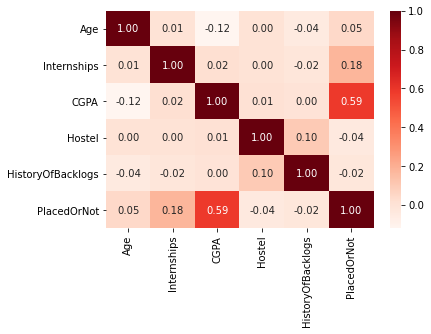

In [7]:
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='Reds')

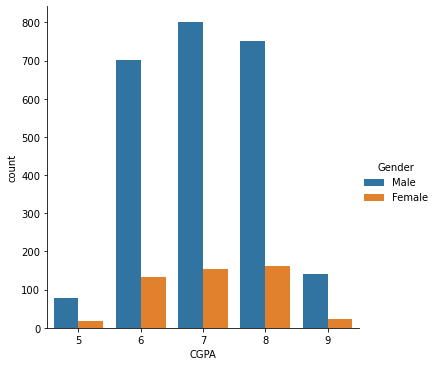

In [8]:
sns.catplot(x='CGPA', data=data, hue='Gender', kind='count')

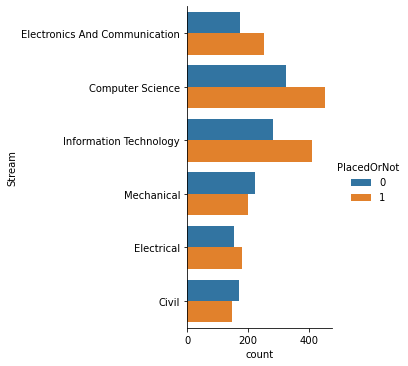

In [9]:
sns.catplot( y='Stream', data=data, hue='PlacedOrNot', kind='count')

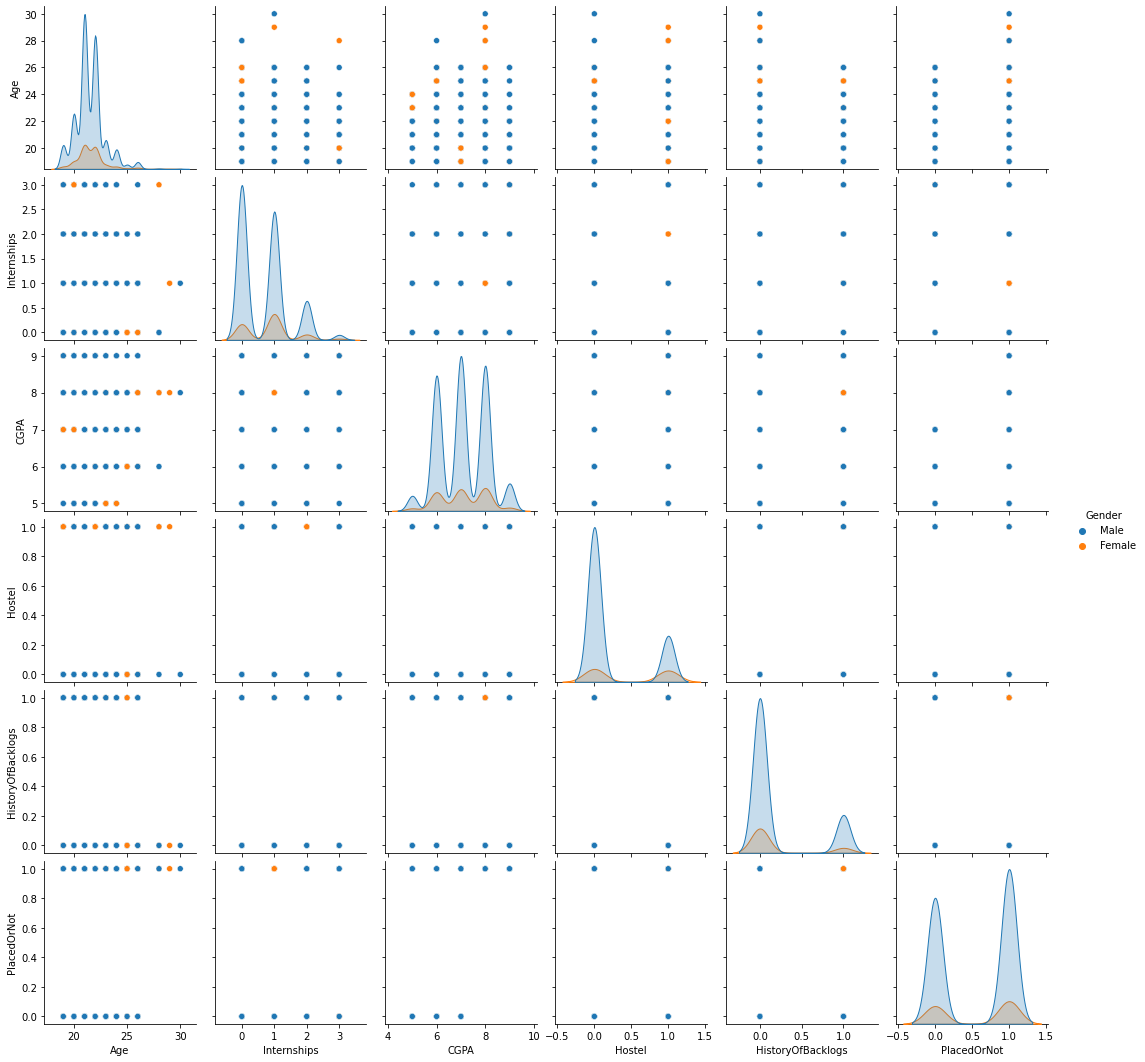

In [10]:
sns.pairplot(data=data, hue='Gender')

## Preprocessing

In [11]:
data.drop_duplicates(inplace=True)
data.shape

(1137, 8)

In [12]:
from sklearn.preprocessing import LabelEncoder
def preprocessor(data):
    res_data = data.copy()
    le = LabelEncoder()
    
    res_data['Gender'] = le.fit_transform(res_data['Gender'])
    res_data['Stream'] = le.fit_transform(res_data['Stream'])
    res_data['Hostel'] = le.fit_transform(res_data['Hostel'])
    res_data['PlacedOrNot'] = le.fit_transform(res_data['PlacedOrNot'])
    return res_data

In [13]:
encoded_data = preprocessor(data)
encoded_data.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,1,3,1,8,1,1,1
1,21,0,1,0,7,1,1,1
2,22,0,4,1,6,0,0,1
3,21,1,4,0,8,0,1,1
4,22,1,5,0,8,1,0,1


In [14]:
x = encoded_data.iloc[:, :-1]
y = encoded_data['PlacedOrNot']

## Train Test Split

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
def classify(model):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print('Traing Score', model.score(x_train, y_train)*100)
    print('Accuracy', accuracy_score(y_test, y_pred)*100)
    score = cross_val_score(model, x, y, cv=10)
    print('Cross Validation Score', np.mean(score)*100)

###  Using Different ML Models

In [17]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model)

Traing Score 72.16721672167216
Accuracy 70.17543859649122
Cross Validation Score 70.91057289240801


In [18]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model)

Traing Score 91.74917491749174
Accuracy 73.24561403508771
Cross Validation Score 71.61931377115354


In [19]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
classify(model)

Traing Score 91.74917491749174
Accuracy 75.0
Cross Validation Score 71.70548051544792


In [20]:
y_pred = model.predict(x_test)

## Confusion Matrix & Classification Report

Text(0.5, 1.0, 'Actual vs. Predicted Confusion Matrix')

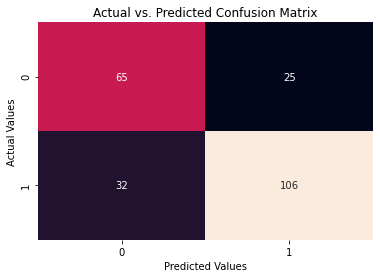

In [21]:
from sklearn.metrics import confusion_matrix
confu = confusion_matrix(y_test, y_pred)
sns.heatmap(confu, annot=True, fmt='d', cbar=False, )
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.72      0.70        90
           1       0.81      0.77      0.79       138

    accuracy                           0.75       228
   macro avg       0.74      0.75      0.74       228
weighted avg       0.75      0.75      0.75       228



### ROC Curve 

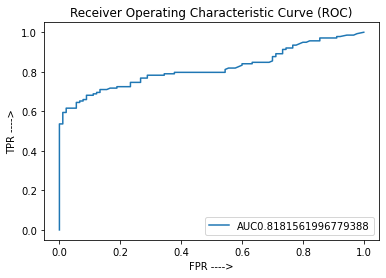

In [23]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_prob = model.predict_proba(x_test)[::, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)
plt.plot(fpr, tpr, label='AUC'+str(auc))
plt.legend(loc = 4)
plt.title("Receiver Operating Characteristic Curve (ROC)")
plt.xlabel("FPR ---->")
plt.ylabel("TPR ---->")
plt.show()